# Practice Session 06: Network models


Author: <font color="blue">Stuart Lance Richards-Weir</font>

E-mail: <font color="blue">stuartlance.richardsweir01@estudiant.upf.edu</font>

Date: <font color="blue">04/11/2025</font>

# 1. Random (ER) graph generator

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict


In [35]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

In [36]:
def generate_random_graph(N, p)-> nx.Graph:
    g = nx.Graph()
    for i in range(N):
        g.add_node(i)
        for j in range(i):
            if flip_coin(p):
                g.add_edge(i,j)
    return g
            

In [37]:
N_try = 50
p_try = 0.5
num_graphs = 1000
g = []
observed_edges = []

for i in range(num_graphs):
    g.append(generate_random_graph(N_try,p_try))
    #print(len(g[i]))
    #print(g[i].number_of_edges())
    observed_edges.append(g[i].number_of_edges())

In [38]:
trials = num_graphs
max_edges = (N_try * (N_try - 1)) / 2  
expected_edges = max_edges * p_try
print("Expected number of edges:", expected_edges)

Expected number of edges: 612.5


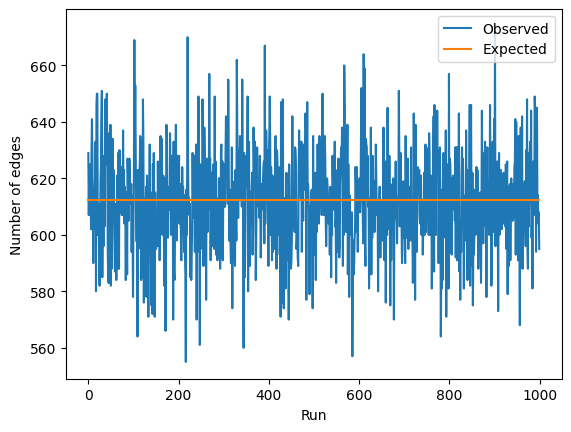

In [39]:
# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(trials), observed_edges, label="Observed")
plt.plot(range(trials), [expected_edges] * trials, label="Expected")
plt.legend()
plt.show()

In [40]:
def generate_random_graph_avg_degree(N, kavg) -> nx.Graph:
    max_edges = (N * (N - 1)) / 2  
    # expected_edges = max_edges * p_try
    
    expected_edges = N * kavg / 2

    p_try = float(expected_edges / max_edges)
    return generate_random_graph(N, p_try)

In [41]:
def graph_average_degree(graph : nx.Graph)-> float:
    avg = 2 * graph.number_of_edges() / graph.number_of_nodes()
    return avg

In [42]:
target_average_degrees =  []
observed_average_degrees = []
for i in range(31):
    kavg = 0.1*i
    target_average_degrees.append(kavg)
    N = 500
    graph = generate_random_graph_avg_degree(N, kavg)
    obs_avg = graph_average_degree(graph)
    observed_average_degrees.append(obs_avg)

    print(f"expected average: {kavg},   observed average {obs_avg}")

expected average: 0.0,   observed average 0.0
expected average: 0.1,   observed average 0.096
expected average: 0.2,   observed average 0.212
expected average: 0.30000000000000004,   observed average 0.272
expected average: 0.4,   observed average 0.36
expected average: 0.5,   observed average 0.524
expected average: 0.6000000000000001,   observed average 0.616
expected average: 0.7000000000000001,   observed average 0.668
expected average: 0.8,   observed average 0.936
expected average: 0.9,   observed average 0.916
expected average: 1.0,   observed average 0.98
expected average: 1.1,   observed average 1.108
expected average: 1.2000000000000002,   observed average 1.324
expected average: 1.3,   observed average 1.208
expected average: 1.4000000000000001,   observed average 1.396
expected average: 1.5,   observed average 1.472
expected average: 1.6,   observed average 1.66
expected average: 1.7000000000000002,   observed average 1.708
expected average: 1.8,   observed average 1.756
ex

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


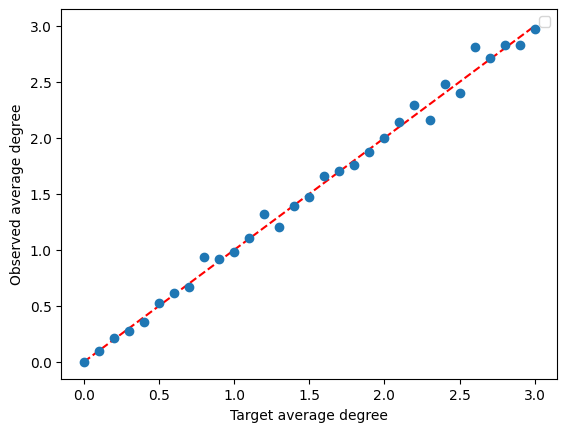

In [43]:
# Leave as-is

#!! Be careful make sure to run the previous cell just before running this one as we will be using some of the variables later and it can cause issues

plt.xlabel("Target average degree")
plt.ylabel("Observed average degree")
plt.scatter(target_average_degrees, observed_average_degrees)
plt.plot([0,max(target_average_degrees)], [0,max(target_average_degrees)], 'r--', zorder= 0)
plt.legend()
plt.show()

## 1.2. Measure connectivity


In [44]:
def is_connected(g:nx.Graph)->bool: # Here we specify function signature: name, params,output type
    for u, v in itertools.combinations(g.nodes, 2): # Loop over every pair of nodes (handshake lemma)
        if nx.has_path(g, u, v) == False: # Iff path doesn't exist between any two nodes, the whole graph must be disconnected somewhere --> return false
            return False
    return True # if no disconnect found btw any two nodes, it must be connected

# Optimise with already_visited sets?

In [45]:
# Leave as-is

def size_largest_cc(G):

    # Obtain the list of connected components of the graph sorted from largest to smallest
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

    # Selects the first connected component in that list
    G0 = G.subgraph(Gcc[0])

    # Returns its number of nodes
    return G0.number_of_nodes()

In [46]:
N = 1000
target_average_degree = 0.2
average_degrees = []
largest_cc_sizes = []

while target_average_degree <= 2.0:
    
    graph = generate_random_graph_avg_degree(N, target_average_degree)
    assert graph.number_of_nodes() == N, "Wrong number of nodes"

    average_degree = graph_average_degree(graph)
    average_degrees.append(average_degree)

    largest_cc_size = size_largest_cc(graph)
    largest_cc_sizes.append(largest_cc_size)

    target_average_degree += 0.05

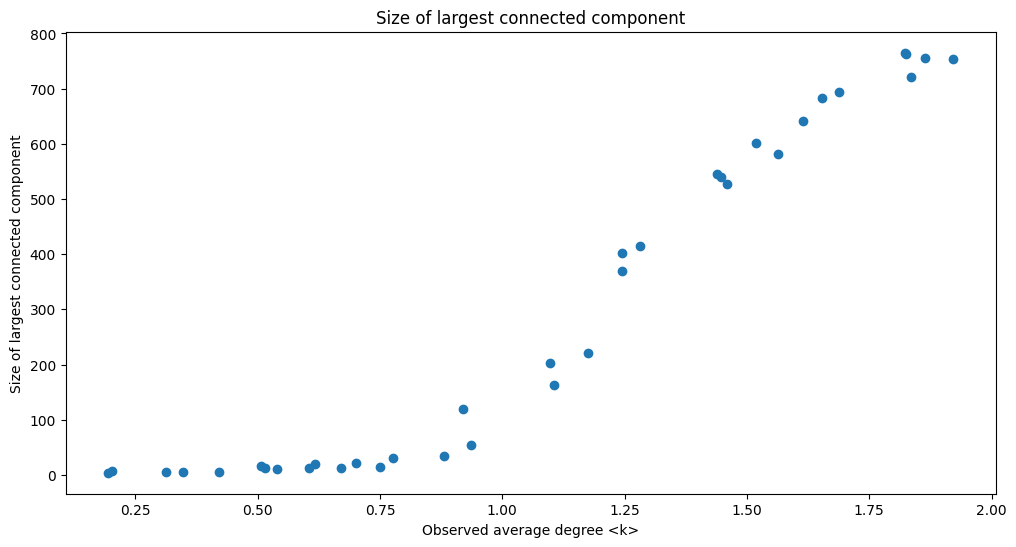

In [47]:
# LEAVE AS-IS

plt.figure(figsize=(12,6))
plt.scatter(average_degrees, largest_cc_sizes)
plt.title("Size of largest connected component")
plt.xlabel("Observed average degree <k>")
plt.ylabel("Size of largest connected component")
plt.show()

Theory says that at $<k>$ < 1 only small clusters should be found, $<k>$ = 1 acts as a percolation barrier and $<k>$ > 1 the size of the largest connected component should increase. 

The graph above shows this behaviour very clearly, with $<k>$ = 1 being an inflection point for an increase in lcc size


## 1.3. Degree distributions and Cumulative Degree Distributions

In [48]:
def print_er_statistics(g, p):
    """
    Print observed and expected average degree for an ER graph g with probability p.
    """
    N = g.number_of_nodes()
    observed_avg = graph_average_degree(g)  # uses function defined earlier in the notebook
    expected_avg = p * (N - 1)  # expected degree in G(N,p)
    print(f"ER graph: N={N}, p={p}")
    print(f"  Observed average degree: {observed_avg:.4f}")
    print(f"  Expected average degree: {expected_avg:.4f}")
    print(f"  Number of edges: {g.number_of_edges()}")
    print()

In [49]:
# Leave as-is or modify if you want
def plot_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        prob, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        plt.plot(bin_edges[:-1], prob, 'o-', label=f'p={p}')

    plt.title("Probability Density Function (Degree Distribution)")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


def plot_cumulative_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        degree_counts, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        cumulative_distribution = np.cumsum(degree_counts[::-1])[::-1]

        plt.plot(bin_edges[:-1], cumulative_distribution, 'o-', label=f'p={p}')

    plt.title("Cumulative Degree Distribution (P(k' ≥ k))")
    plt.xlabel("Degree (k)")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


ER graph: N=500, p=0.01
  Observed average degree: 4.8920
  Expected average degree: 4.9900
  Number of edges: 1223

ER graph: N=500, p=0.03
  Observed average degree: 15.1800
  Expected average degree: 14.9700
  Number of edges: 3795

ER graph: N=500, p=0.1
  Observed average degree: 50.3840
  Expected average degree: 49.9000
  Number of edges: 12596



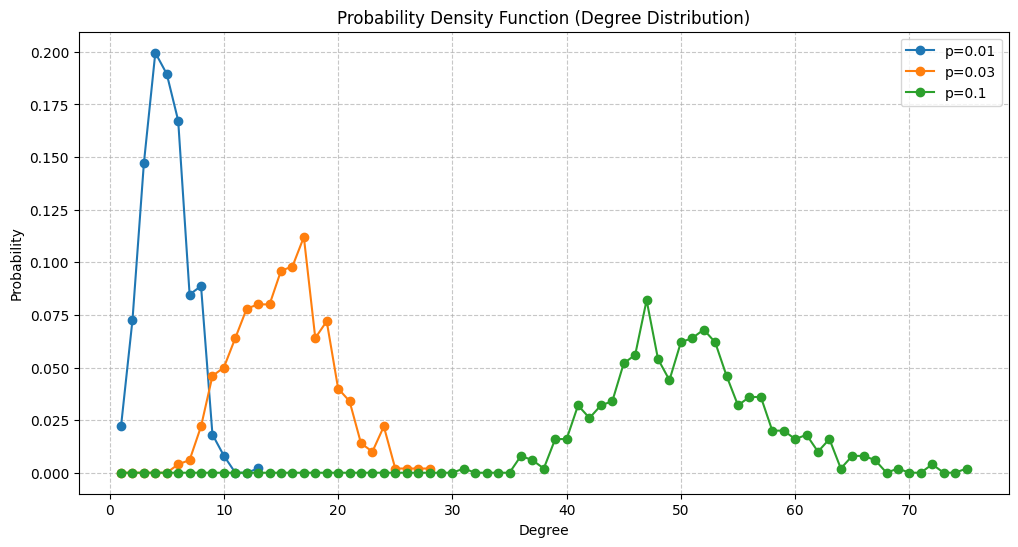

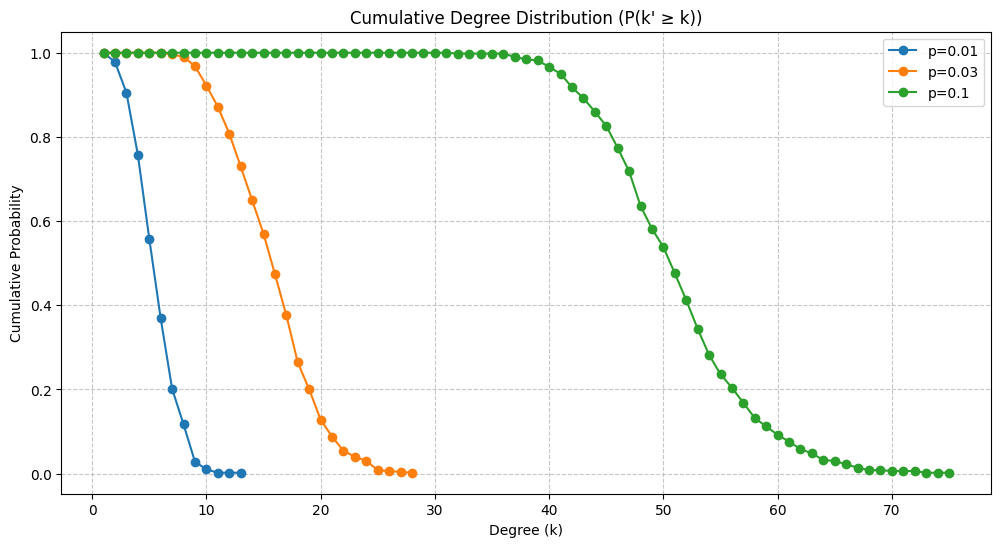

In [50]:

# Generate three ER graphs with N=500 and p in [0.01, 0.03, 0.1], then print statistics
N = 500
p_values = [0.01, 0.03, 0.1]
g_list = [generate_random_graph(N, p) for p in p_values]

for g, p in zip(g_list, p_values):
    print_er_statistics(g, p)

# Plot degree distributions and cumulative degree distributions if plotting helpers are available
try:
    plot_degree_distributions(g_list, p_values)
    plot_cumulative_degree_distributions(g_list, p_values)
except NameError:
    # plotting helpers not available in this execution order
    pass

ER graph: N=2000, p=0.0005
  Observed average degree: 1.0140
  Expected average degree: 0.9995
  Number of edges: 1014

ER graph: N=2000, p=0.001
  Observed average degree: 1.9940
  Expected average degree: 1.9990
  Number of edges: 1994

ER graph: N=2000, p=0.005
  Observed average degree: 9.9530
  Expected average degree: 9.9950
  Number of edges: 9953

ER graph: N=2000, p=0.01
  Observed average degree: 20.2560
  Expected average degree: 19.9900
  Number of edges: 20256



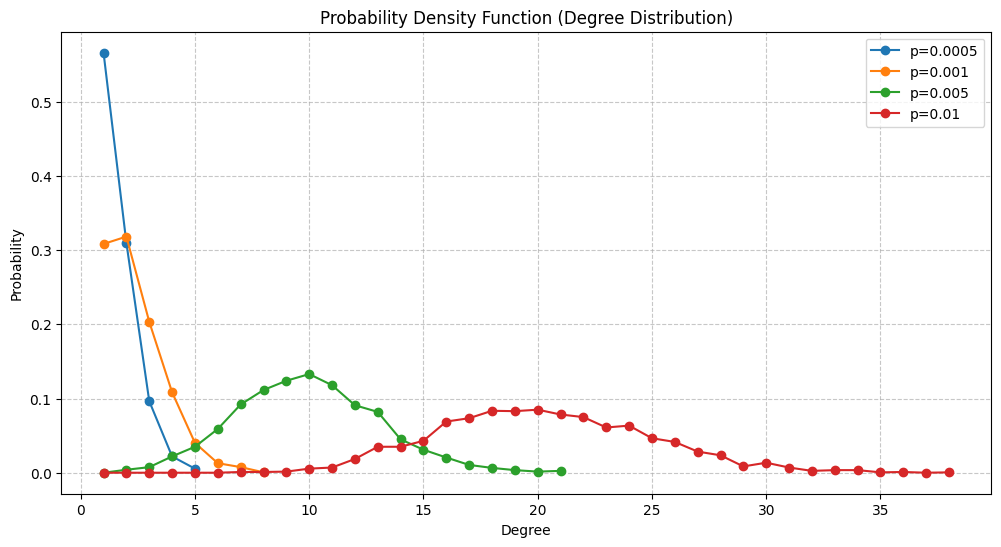

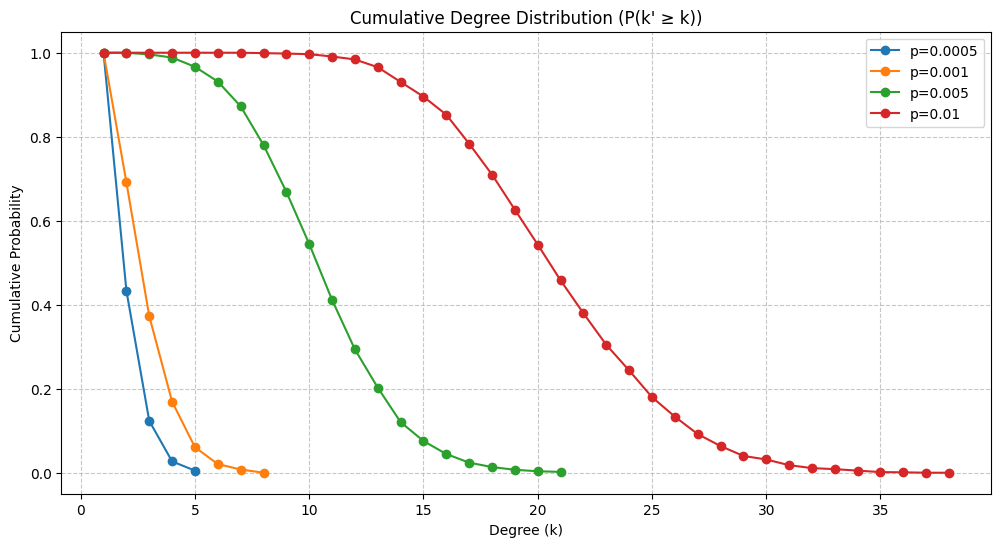

In [51]:
# Generate four ER graphs with a fixed N (between 1500 and 3000 => 2000) and increasing p values.
# For each graph: print observed and expected average degree, plot degree distribution and cumulative.

N_large = 2000
p_values_large = [0.0005, 0.001, 0.005, 0.01]  # start sparse and increase

# Gen graphs
g_list_large = [generate_random_graph(N_large, p) for p in p_values_large]

# Print stats
for g, p in zip(g_list_large, p_values_large):
    print_er_statistics(g, p)

# Plot probability density (degree dist) and cumulative degree dist
plot_degree_distributions(g_list_large, p_values_large)
plot_cumulative_degree_distributions(g_list_large, p_values_large)

# 2. Preferential attachment (BA) generator

In [52]:
# LEAVE AS-IS

def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

In [53]:
# LEAVE AS-IS

trials = 1500
vector = ['a', 'b', 'c']
probabilities = [0.75, 0.13, 0.12]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)

for i, p in zip(vector, probabilities):
    print("Element {:s} was selected {:d} times, expected {:.0f}".format(i, all_selected.count(i), trials*p) )

Element a was selected 1118 times, expected 1125
Element b was selected 202 times, expected 195
Element c was selected 180 times, expected 180


In [54]:
# Leave as is
def estimate_alpha_mle(degrees, k_min=1):
    degrees = np.array(degrees)
    degrees = degrees[degrees >= k_min]
    n = len(degrees)
    alpha = 1 + n / np.sum(np.log(degrees / (k_min - 0.5)))
    return alpha

In [55]:
def select_targets(g, m):
    """
    Select m target nodes from graph g with probability proportional to node degrees.
    Raises ValueError if graph has fewer than m nodes or if sum of degrees is zero.
    """
    # Ensure feasibility!!
    N = g.number_of_nodes()
    if N < m:
        raise ValueError("Graph has less than m nodes")

    # Get ordered list of nodes so probabilities aling with select
    nodes = list(g.nodes())

    # Compute degrees for each node and the total degree
    degrees = np.array([g.degree(n) for n in nodes], dtype=float)
    sum_degree = degrees.sum()

    if sum_degree == 0:
        raise ValueError("Graph has no edges (sum of degrees is zero)")

    # Probabilities proportional to degree
    probabilities = degrees / sum_degree

    # Sample m distinct nodes without replacement using the helper
    selected = select_with_probability(nodes, m, probabilities)

    return list(selected)


def generate_preferential_attachment_graph(N, m0, m):
    """
    Gen a BA style preferential attachment graph following the assignment spec.

    Steps:
    - Check m <= m0
    - Create empty graph
    - Add initial m0 nodes (0 .. m0-1)
    - Create a cycle among the initial m0 nodes
    - For each new node u in range(m0, N):
        * select m targets from existing graph proportional to degree
        * add node u
        * connect u to each selected target
    - Return graph
    """
    if m > m0:
        raise ValueError("m must be <= m0")

    if N < m0:
        raise ValueError("N must be >= m0")

    G = nx.Graph()

    # Add initial m0 nodes
    for i in range(m0):
        G.add_node(i)

    # Create cycle among initial nodes: 0-1, 1-2, ..., m0-1 - 0
    for i in range(m0):
        G.add_edge(i, (i + 1) % m0)

    # Grow the network
    for u in range(m0, N):
        # Select targets from current graph (before adding u)
        targets = select_targets(G, m)

        # Add the new node
        G.add_node(u)

        # Connect new node to each selected target
        for t in targets:
            G.add_edge(u, int(t))  # ensure t is hashable/int

    return G


def plot_degree_distribution_loglog(g, k_min=1):
    """
    Plot degree distribution on log-log scale and overlay MLE power-law fit.
    Uses estimate_alpha_mle defined elsewhere in the notebook.
    """
    degree_dict = dict(g.degree())
    degree_sequence = np.array(list(degree_dict.values()))
    degree_sequence = degree_sequence[degree_sequence >= k_min]

    if len(degree_sequence) == 0:
        print("No degrees >= k_min; nothing to plot")
        return

    # Empirical histogram (probability mass function)
    prob, bin_edges = np.histogram(
        degree_sequence,
        bins=range(k_min, np.max(degree_sequence) + 2),
        density=True
    )

    x = bin_edges[:-1].astype(float)
    y = prob

    # Filter zeros for log plotting
    mask = y > 0
    x = x[mask]
    y = y[mask]

    if len(x) == 0:
        print("No positive-probability bins to plot")
        return

    # Estimate alpha using MLE helper (requires raw degrees and k_min)
    alpha = estimate_alpha_mle(degree_sequence, k_min=k_min)

    # Power-law fit normalized to empirical first point
    # y_fit = C * x^(-alpha). Choose C so y_fit[0] == y[0]
    y_fit = y[0] * (x / x[0]) ** (-alpha)

    # Plot empirical and fit on log-log
    plt.figure(figsize=(12, 6))
    plt.loglog(x, y, 'o', alpha=0.7, label='Empirical data')
    plt.loglog(x, y_fit, '--', color='red', label=f'MLE Power-law fit: α={alpha:.2f}')
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Generating BA graph: N=5000, m0=5, m=3


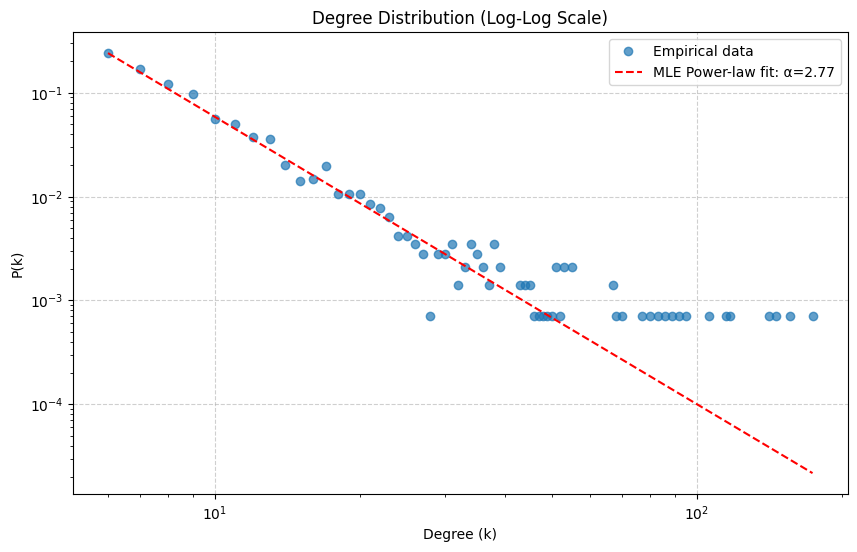

Estimated alpha (k_min=6): 2.7652

Generating BA graph: N=5000, m0=7, m=2


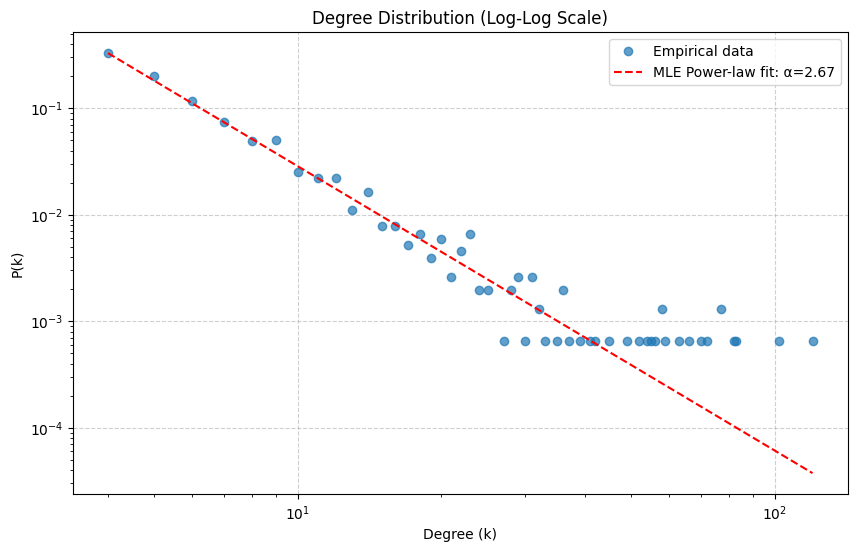

Estimated alpha (k_min=4): 2.6692



In [ ]:
# Complete and use a log-log degree distribution plotter with MLE power-law fit,
# then generate two BA graphs with N=5000 and plot them (k_min = 2*m).

def plot_degree_distribution_loglog(g, k_min=1): # Now returns alpha
    """
    Plot degree distribution on log-log scale and overlay MLE power-law fit.
    Returns estimated alpha.
    """
    degree_dict = dict(g.degree())
    degree_sequence = np.array(list(degree_dict.values()))
    degree_sequence = degree_sequence[degree_sequence >= k_min]

    if len(degree_sequence) == 0:
        print("No degrees >= k_min; nothing to plot")
        return None

    # Empirical histogram (probability mass function)
    prob, bin_edges = np.histogram(
        degree_sequence,
        bins=range(k_min, np.max(degree_sequence) + 2),
        density=True
    )

    x = bin_edges[:-1].astype(float)
    y = prob

    # Filter zeros for log plotting
    mask = y > 0
    x = x[mask]
    y = y[mask]

    if len(x) == 0:
        print("No positive-probability bins to plot")
        return None

    # Estimate alpha using MLE helper defined earlier in the notebook
    alpha = estimate_alpha_mle(degree_sequence, k_min=k_min)

    # Power-law fit normalized to empirical first point
    y_fit = y[0] * (x / x[0]) ** (-alpha)

    # Plot empirical and fit on log-log
    plt.figure(figsize=(10, 6))
    plt.loglog(x, y, 'o', alpha=0.7, label='Empirical data')
    plt.loglog(x, y_fit, '--', color='red', label=f'MLE Power-law fit: α={alpha:.2f}')
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return alpha

# Generate two BA graphs with N=5000 and chosen (m0, m) pairs in range 1-10.
configs = [(5000, 5, 3), (5000, 7, 2)]  # (N, m0, m)

for N_ba, m0, m in configs:
    print(f"Generating BA graph: N={N_ba}, m0={m0}, m={m}")
    G_ba = generate_preferential_attachment_graph(N_ba, m0, m)
    kmin = max(1, 2 * m)  # tip recommended: k_min = 2*m
    alpha_est = plot_degree_distribution_loglog(G_ba, k_min=kmin)
    if alpha_est is not None:
        print(f"Estimated alpha (k_min={kmin}): {alpha_est:.4f}\n")

When alpha = 3
Preferential attachment: In this model, new nodes are more likely to connect to nodes that already have a high number of connections, creating "hubs". This mechanism leads to the scale-free property and the specific exponent value of 3, which is what is estimated above

# 3. ER and BA graph Comparison

In [57]:
#Leave as is
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

ER graph statistics:
ER graph: N=300, p=0.02
  Observed average degree: 5.7333
  Expected average degree: 5.9800
  Number of edges: 860

BA graph statistics:
BA graph: N=300, m0=5, m=1
  Observed average degree: 2.0000
  Expected average degree (approx): 2.0000
  Number of edges: 300



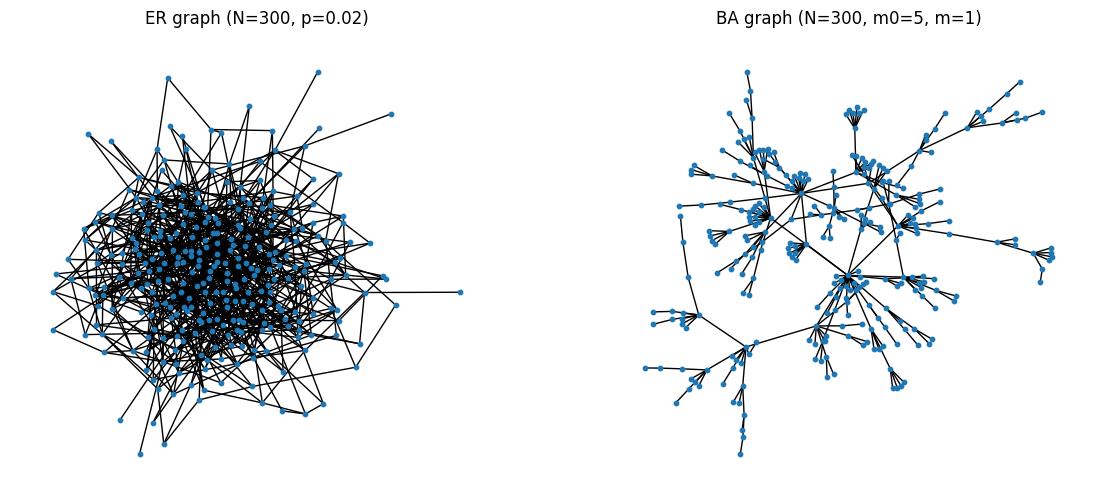

ER degree distribution:


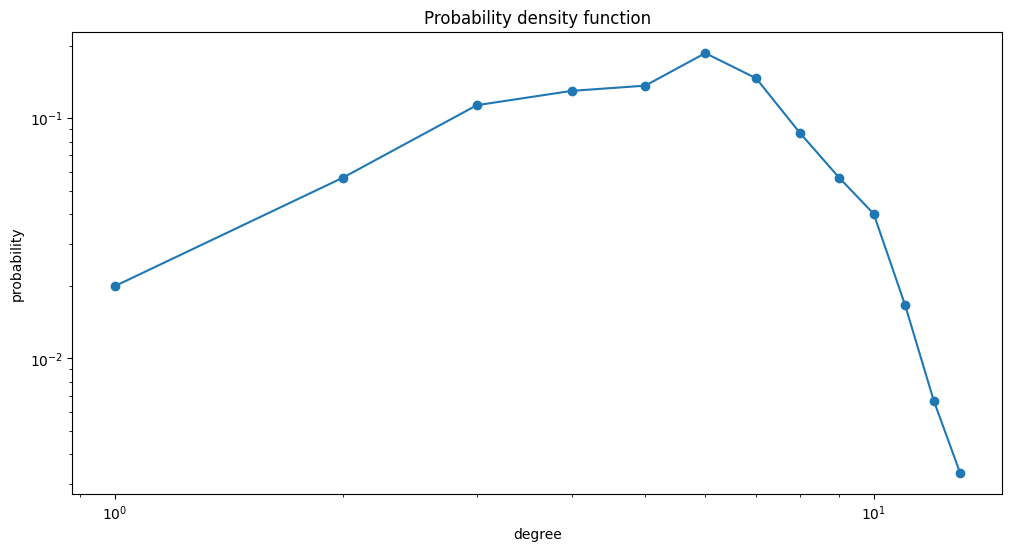

BA degree distribution:


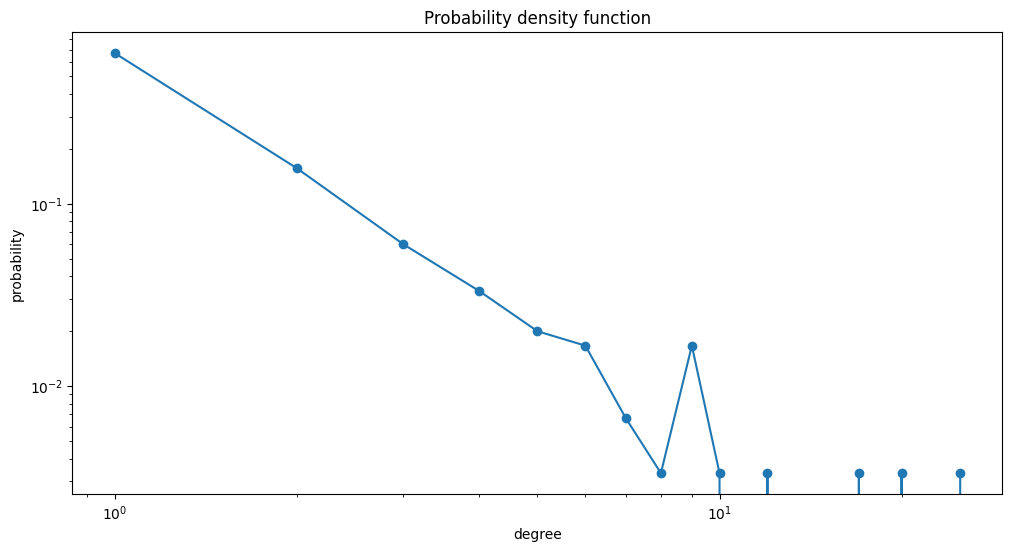

In [58]:
# Generate ER and BA graphs of size 300 and visualize them and their degree distributions.

N_small = 300
p_er = 0.02
m0_small = 5
m_small = 1

# Generate graphs (uses functions already defined in the notebook)
er_g = generate_random_graph(N_small, p_er)
ba_g = generate_preferential_attachment_graph(N_small, m0_small, m_small)

# Print statistics
print("ER graph statistics:")
print_er_statistics(er_g, p_er)

print("BA graph statistics:")
obs_avg_ba = graph_average_degree(ba_g)
expected_avg_ba = 2 * m_small  # in BA each new node adds m_small edges -> average degree ~ 2m
print(f"BA graph: N={ba_g.number_of_nodes()}, m0={m0_small}, m={m_small}")
print(f"  Observed average degree: {obs_avg_ba:.4f}")
print(f"  Expected average degree (approx): {expected_avg_ba:.4f}")
print(f"  Number of edges: {ba_g.number_of_edges()}\n")

# Draw graphs side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title(f"ER graph (N={N_small}, p={p_er})")
plt.axis('off')
pos_er = nx.spring_layout(er_g, seed=42)
nx.draw_networkx(er_g, pos=pos_er, with_labels=False, node_size=10)

plt.subplot(1, 2, 2)
plt.title(f"BA graph (N={N_small}, m0={m0_small}, m={m_small})")
plt.axis('off')
pos_ba = nx.spring_layout(ba_g, seed=42)
nx.draw_networkx(ba_g, pos=pos_ba, with_labels=False, node_size=10)

plt.show()

# Plot degree distributions (uses helper plot_degree_distribution defined in the notebook)
print("ER degree distribution:")
plot_degree_distribution(er_g)

print("BA degree distribution:")
plot_degree_distribution(ba_g)

1. Structure of the network  
- ER: nodes connected at random → fairly homogeneous structure, no prominent hubs, node degrees concentrated around the mean; components/giant component depend on <k> (percolation at <k>≈1 like described earlier).  
- BA: growth + preferential attachment → heterogeneous, hub-dominated structure with a few very high-degree nodes that shorten paths and dominate connectivity; more resilient to random node removal but "fragile" to targeted attacks on hubs that act as botttlenecks.

2. Probability density function  
- ER: narrow, peaked (should approximate Poisson for G(N,p)) with quickly decaying/exponential tail; low probability of very large degrees.  
- BA: heavy-tailed (power-law) P(k) ∝ k^(-α) — appears linear on log–log (at the start); non-negligible probability of very large degrees (hubs). Observed α ≈ 2.67 in these notebook runs

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>